In [1]:
%%time

%run dataframes.ipynb

Wall time: 1min 22s


In [2]:
%run funkcje.ipynb

In [3]:
plt.rcParams["figure.figsize"] = (8,6)
#plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

In [4]:
#Ilość całkowitych przypadków w czasie dla wybranego powiatu

# which_district = "warszawa"
# fig, ax = plt.subplots()
# plt.plot_date(infections[infections.district == which_district]["date"], infections[infections.district == which_district]["infected_total"])
# plt.xlabel('Data')
# #plt.xticks([])
# plt.ylabel('Liczba zakażeń')
# every_nth = 3
# for n, label in enumerate(ax.xaxis.get_ticklabels()):
#     if n % every_nth != 0:
#         label.set_visible(False)
# plt.title("Warszawa")

In [5]:
#Ilość całkowitych śmierci w czasie dla wybranego powiatu

# which_district = "warszawa"
# fig, ax = plt.subplots()
# plt.plot_date(deaths[deaths.district == which_district]["date"], deaths[deaths.district == which_district]["dead_total"])
# plt.xlabel('Data')
# plt.ylabel('Liczba śmierci')
# every_nth = 3
# for n, label in enumerate(ax.xaxis.get_ticklabels()):
#     if n % every_nth != 0:
#         label.set_visible(False)
# plt.title("Warszawa")

In [6]:
#Ilość nowych przypadków w czasie dla wybranego powiatu

# which_district = "warszawa"
# fig, ax = plt.subplots()
# plt.plot_date(infections[infections.district == which_district]["date"], infections[infections.district == which_district]["new_infected"])
# plt.xlabel('Data')
# #plt.xticks([])
# plt.ylabel('Liczba zakażeń')
# every_nth = 3
# for n, label in enumerate(ax.xaxis.get_ticklabels()):
#     if n % every_nth != 0:
#         label.set_visible(False)
# plt.title("Warszawa")

In [7]:
#Wykres liczby całkowitych przypadków od populacji dla wybranej daty

# x = infections2.loc[infections2['date'] == '2021-09-01', 'population']
# y = infections2.loc[infections2['date'] == '2021-09-01', 'infected_total']

# plt.plot(x, y, 'bo')
# plt.yscale("log")
# plt.xscale("log")
# plt.xlabel('Populacja')
# plt.ylabel('Liczba zakażeń')
# plt.title("01.09.2021r.")

In [8]:
#Wykres liczby całkowitych śmierci od populacji dla wybranej daty

# x = deaths.loc[deaths['date'] == '2020-09-01', 'population']
# y = deaths.loc[deaths['date'] == '2020-09-01', 'dead_total']

# plt.plot(x, y, 'bo')
# plt.yscale("log")
# plt.xscale("log")
# plt.xlabel('Populacja')
# plt.ylabel('Liczba śmierci')
# plt.title("01.09.2020r.")

In [9]:
#Wykres całkowitej liczby przypadków od populacji dla pierwszego dnia pandemii

# x = infections.loc[infections['pandemic_day'] == 0, 'population']
# y = infections.loc[infections['pandemic_day'] == 0, 'infected_total']

# plt.plot(x, y, 'bo')
# plt.xlabel('Populacja')
# plt.ylabel('Liczba zakażeń')

# #tutaj widać, że przez wybrakowane dane na początku, niektóre powiaty w pierwszy dzień mają dużo zakażonych 
# #(zweryfikowałem, tak jest w danych)

In [10]:
#Wykres całkowitej liczby śmierci od populacji dla pierwszego dnia pandemii

# x = deaths.loc[deaths['pandemic_day'] == 0, 'population']
# y = deaths.loc[deaths['pandemic_day'] == 0, 'dead_total']

# plt.plot(x, y, 'bo')
# plt.xlabel('Populacja')
# plt.ylabel('Liczba zgonów')

# #tutaj widać, że przez wybrakowane dane na początku, niektóre powiaty w pierwszy dzień mają dużo zakażonych 
# #(zweryfikowałem, tak jest w danych)
#

In [11]:
# print(deaths)
#print_full(population)
# print_full(infections.loc[infections['pandemic_day'] == 200, 'population'])
# print_full(deaths.loc[deaths['population'] == 1790658])

a = 0.08726274214521247
b = -610.407960558372
R^2 = 0.9877648859289839
p = 5.277533559331514e-61


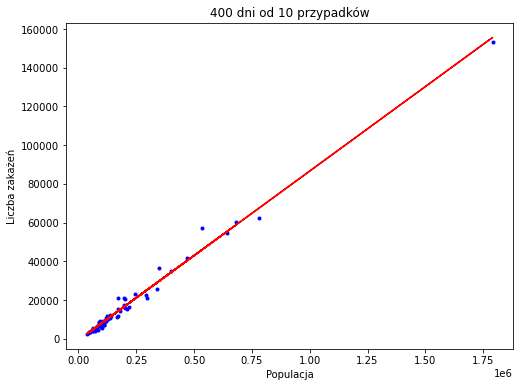

In [12]:
#Wykres całkowitej liczby przypadków od populacji dla wybranego dnia pandemii razem z dopasowaniem
#skala lin-lin

pandemic_day_num = 400
x = infections_cities.loc[infections_cities['pandemic_day'] == pandemic_day_num, 'population']
y = infections_cities.loc[infections_cities['pandemic_day'] == pandemic_day_num, 'infected_total'] #, 'infected_mean']

a, b, r, p, std_err = fit_n_plot_linlin_scipy(x, y, str(pandemic_day_num)+" dni od 10 przypadków", "Populacja", "Liczba zakażeń")
print("a = "+str(a))
print("b = "+str(b))
print("R^2 = "+str(r*r))
print("p = "+str(p))

a = 0.001370536508734621
b = 99.4612857094852
R^2 = 0.937502714286488
p = 3.0080622047045745e-40


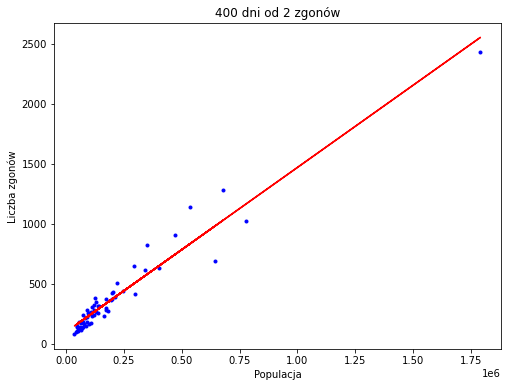

In [13]:
#Wykres całkowitej liczby śmierci od populacji dla wybranego dnia pandemii razem z dopasowaniem
#skala lin-lin

pandemic_day_num = 400
x = deaths_cities.loc[deaths_cities['pandemic_day'] == pandemic_day_num, 'population']
y = deaths_cities.loc[deaths_cities['pandemic_day'] == pandemic_day_num, 'dead_total']

a, b, r, p, std_err = fit_n_plot_linlin_scipy(x, y, str(pandemic_day_num)+" dni od 2 zgonów", "Populacja", "Liczba zgonów")
print("a = "+str(a))
print("b = "+str(b))
print("R^2 = "+str(r*r))
print("p = "+str(p))

#dlaczego wykres tak, sprawdzić warszawę

a = 1.0829579550773993
b = -1.5280038289802285
R^2 = 0.9722997187819155
p = 5.332236809862835e-50


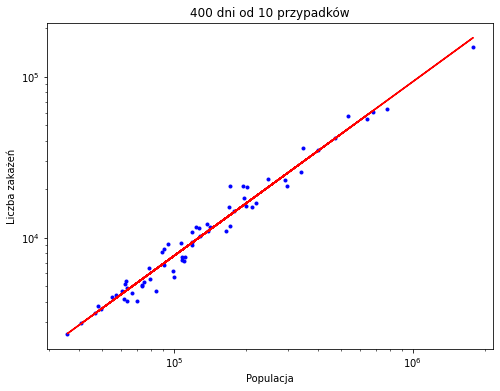

In [14]:
#Wykres całkowitej liczby przypadków od populacji dla wybranego dnia pandemii razem z dopasowaniem
#skala log-log

pandemic_day_num = 400
x = infections_cities.loc[infections_cities['pandemic_day'] == pandemic_day_num, 'population']
y = infections_cities.loc[infections_cities['pandemic_day'] == pandemic_day_num, 'infected_total']

a, b, r, p, std_err = fit_n_plot_loglog_scipy(x, y, str(pandemic_day_num)+" dni od 10 przypadków", "Populacja", "Liczba zakażeń")
print("a = "+str(a))
print("b = "+str(b))
print("R^2 = "+str(r*r))
print("p = "+str(p))

In [15]:
# #print_full(infections.loc[infections['district'] == 'warszawa'])
# #print_full(infections.loc[infections['pandemic_day'] == 1])


# x = infections.loc[(infections['district'] == 'warszawa') & (infections['pandemic_day'] > 250) & (infections['pandemic_day'] < 300), 'date']
# y = infections.loc[(infections['district'] == 'warszawa') & (infections['pandemic_day'] > 250) & (infections['pandemic_day'] < 300) , 'new_infected']
# plt.plot(x, y)
# plt.xlabel('Dzień pandemiczny')
# plt.ylabel('Liczba nowych zarażonych')
# plt.title("Warszawa")

In [16]:
dti = pd.date_range("2020-11-23", periods=7, freq="7D")
#print(dti)

In [17]:
# print_full(deaths.loc[deaths['district'] == "warszawa"])

Text(0.5, 1.0, 'Warszawa')

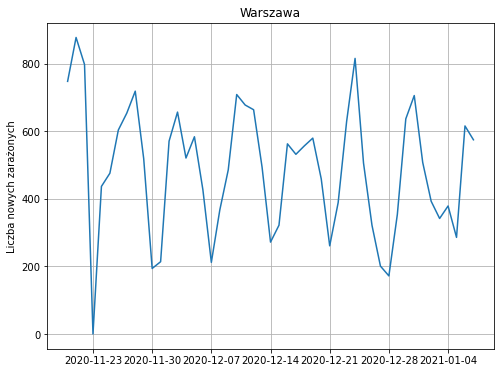

In [18]:
x = infections.loc[(infections['district'] == 'warszawa') & (infections['date'] > '2020-11-19') & (infections['date'] < '2021-01-08'), 'date']
y = infections.loc[(infections['district'] == 'warszawa') & (infections['date'] > '2020-11-19') & (infections['date'] < '2021-01-08') , 'new_infected']
plt.plot(x, y)
plt.xlabel('')
plt.ylabel('Liczba nowych zarażonych')
plt.xticks(dti)
plt.grid(visible = True)
plt.title("Warszawa")

In [19]:
# x = infections.loc[(infections['district'] == 'warszawa') & (infections['date'] > '2020-11-19') & (infections['date'] < '2021-01-08'), 'date']
# y = infections.loc[(infections['district'] == 'warszawa') & (infections['date'] > '2020-11-19') & (infections['date'] < '2021-01-08') , 'new_infected']

# plt.plot(x, y)
# plt.xlabel('Data')
# plt.ylabel('Liczba nowych zarażonych')
# plt.xticks(dti)
# plt.grid(visible = True)
# plt.title("Warszawa")





In [20]:
# # tutaj znajduję impostorów

# print_full(infections.loc[(infections['infected_total'] < 800) & (infections['pandemic_day'] > 350) & (infections['pandemic_day'] < 400)])

In [21]:
# # tutaj badam impostorów

# print_full(infections.loc[(infections['district'] == "bielski") & (infections['province'] == "śląskie") & (infections['pandemic_day'] > 350) & (infections['pandemic_day'] < 400)])

a = 0.8448377344347899
b = -1.9219834206273676
R^2 = 0.8140690161878997
p = 3.671129375948655e-140


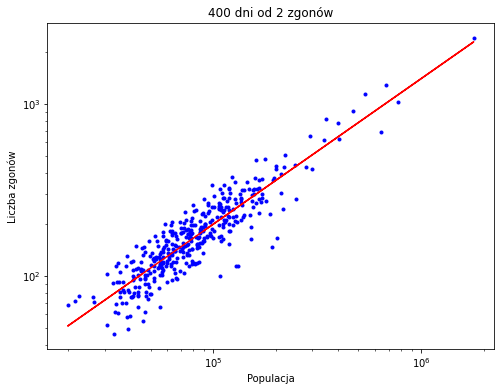

In [22]:
#Wykres całkowitej liczby śmierci od populacji dla wybranego dnia pandemii razem z dopasowaniem
#skala log-log

pandemic_day_num = 400
x = deaths.loc[deaths['pandemic_day'] == pandemic_day_num, 'population']
y = deaths.loc[deaths['pandemic_day'] == pandemic_day_num, 'dead_total']

a, b, r, p, std_err = fit_n_plot_loglog_scipy(x, y, str(pandemic_day_num)+" dni od 2 zgonów", "Populacja", "Liczba zgonów")
print("a = "+str(a))
print("b = "+str(b))
print("R^2 = "+str(r*r))
print("p = "+str(p))

a = 1426.24420045533
b = -7123.3824963349325
R^2 = 0.19219193327537074
p = 0.0002908648483480971


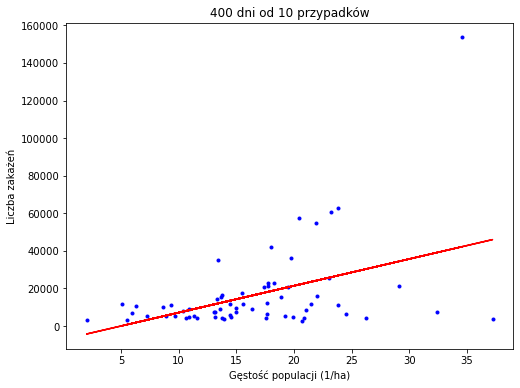

In [23]:
#Wykres całkowitej liczby przypadków od gęstości populacji dla wybranego dnia pandemii razem z dopasowaniem
#skala lin-lin

pandemic_day_num = 400
x = infections_cities.loc[infections_cities['pandemic_day'] == pandemic_day_num, 'density_ppl_per_ha']
y = infections_cities.loc[infections_cities['pandemic_day'] == pandemic_day_num, 'infected_total']

a, b, r, p, std_err = fit_n_plot_linlin_scipy(x, y, str(pandemic_day_num)+" dni od 10 przypadków", "Gęstość populacji (1/ha)", "Liczba zakażeń")
print("a = "+str(a))
print("b = "+str(b))
print("R^2 = "+str(r*r))
print("p = "+str(p))

a = 14.833281801155916
b = 145.79668883570278
R^2 = 0.2821623452373898
p = 4.717971099474644e-29


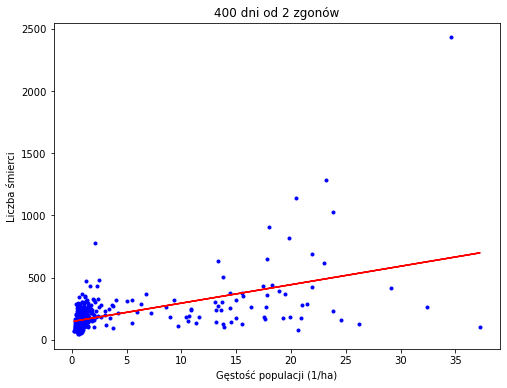

In [24]:
#Wykres całkowitej liczby śmierci od gęstości populacji dla wybranego dnia pandemii razem z dopasowaniem
#skala lin-lin

pandemic_day_num = 400
x = deaths.loc[deaths['pandemic_day'] == pandemic_day_num, 'density_ppl_per_ha']
y = deaths.loc[deaths['pandemic_day'] == pandemic_day_num, 'dead_total']

a, b, r, p, std_err = fit_n_plot_linlin_scipy(x, y, str(pandemic_day_num)+" dni od 2 zgonów", "Gęstość populacji (1/ha)", "Liczba śmierci")
print("a = "+str(a))
print("b = "+str(b))
print("R^2 = "+str(r*r))
print("p = "+str(p))

a = 0.6535003209335026
b = 3.2670057399758865
R^2 = 0.14124957593165713
p = 0.0022101033641965


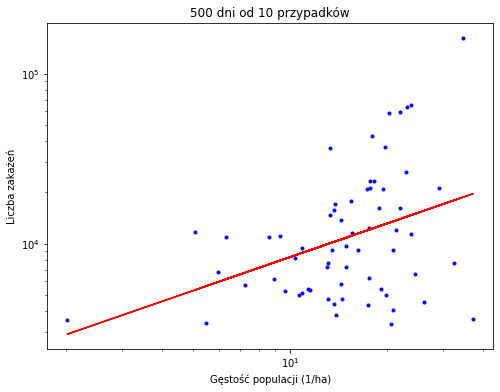

In [25]:
#Wykres całkowitej liczby przypadków od gęstości populacji dla wybranego dnia pandemii razem z dopasowaniem
#skala log-log

pandemic_day_num = 500
x = infections_cities.loc[infections_cities['pandemic_day'] == pandemic_day_num, 'density_ppl_per_ha']
y = infections_cities.loc[infections_cities['pandemic_day'] == pandemic_day_num, 'infected_total']

a, b, r, p, std_err = fit_n_plot_loglog_scipy(x, y, str(pandemic_day_num)+" dni od 10 przypadków", "Gęstość populacji (1/ha)", "Liczba zakażeń")
print("a = "+str(a))
print("b = "+str(b))
print("R^2 = "+str(r*r))
print("p = "+str(p))

a = 0.2516754465016672
b = 2.1877979640658656
R^2 = 0.31994157215918934
p = 1.618870526721575e-33


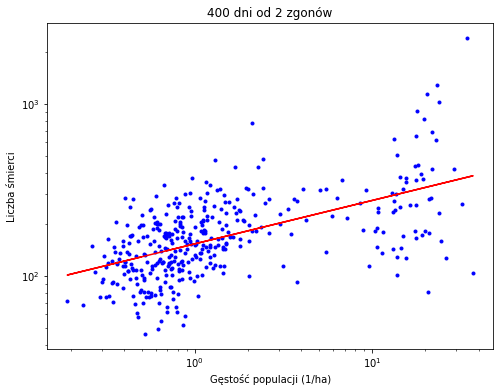

In [26]:
#Wykres całkowitej liczby śmierci od gęstości populacji dla wybranego dnia pandemii razem z dopasowaniem
#skala log-log

pandemic_day_num = 400
x = deaths.loc[deaths['pandemic_day'] == pandemic_day_num, 'density_ppl_per_ha']
y = deaths.loc[deaths['pandemic_day'] == pandemic_day_num, 'dead_total']

a, b, r, p, std_err = fit_n_plot_loglog_scipy(x, y, str(pandemic_day_num)+" dni od 2 zgonów", "Gęstość populacji (1/ha)", "Liczba śmierci")
print("a = "+str(a))
print("b = "+str(b))
print("R^2 = "+str(r*r))
print("p = "+str(p))

a = 0.03052284475333158
b = -1.1390653820740742
R^2 = 0.009007310316917587
p = 0.45568147934085046


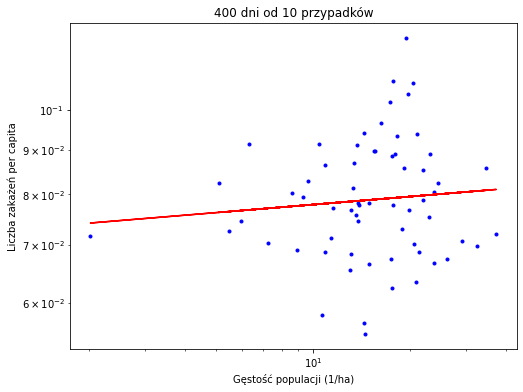

In [27]:
#Wykres całkowitej liczby zakażeń per capita od gęstości populacji dla wybranego dnia pandemii razem z dopasowaniem
#skala log-log

pandemic_day_num = 400
x = infections_cities.loc[infections_cities['pandemic_day'] == pandemic_day_num, 'density_ppl_per_ha']
infectss = infections_cities.loc[infections_cities['pandemic_day'] == pandemic_day_num, 'infected_total']
popul = infections_cities.loc[infections_cities['pandemic_day'] == pandemic_day_num, 'population']
y = infectss / popul

a, b, r, p, std_err = fit_n_plot_loglog_scipy(x, y, str(pandemic_day_num)+" dni od 10 przypadków", "Gęstość populacji (1/ha)", "Liczba zakażeń per capita")
print("a = "+str(a))
print("b = "+str(b))
print("R^2 = "+str(r*r))
print("p = "+str(p))

a = 3.3225787911638285e-08
b = 0.0655338186562718
R^2 = 0.06286525502228826
p = 1.0009805049582346e-06


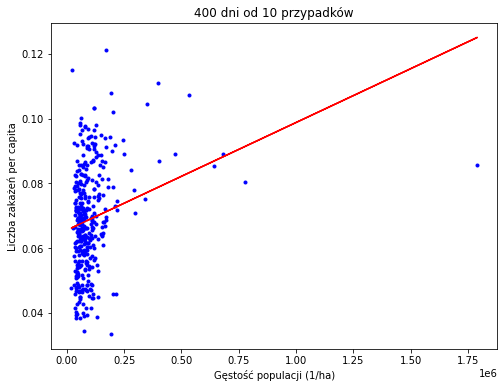

In [28]:
#Wykres całkowitej liczby zakażeń per capita od populacji dla wybranego dnia pandemii razem z dopasowaniem
#skala lin-lin

pandemic_day_num = 400
x = infections.loc[infections['pandemic_day'] == pandemic_day_num, 'population']
infectss = infections.loc[infections['pandemic_day'] == pandemic_day_num, 'infected_total']
popul = infections.loc[infections['pandemic_day'] == pandemic_day_num, 'population']
y = infectss / popul

a, b, r, p, std_err = fit_n_plot_linlin_scipy(x, y, str(pandemic_day_num)+" dni od 10 przypadków", "Gęstość populacji (1/ha)", "Liczba zakażeń per capita")
print("a = "+str(a))
print("b = "+str(b))
print("R^2 = "+str(r*r))
print("p = "+str(p))

a = 0.0735777704002705
b = -1.1838073635393427
R^2 = 0.14342059070261662
p = 4.253271209831797e-14


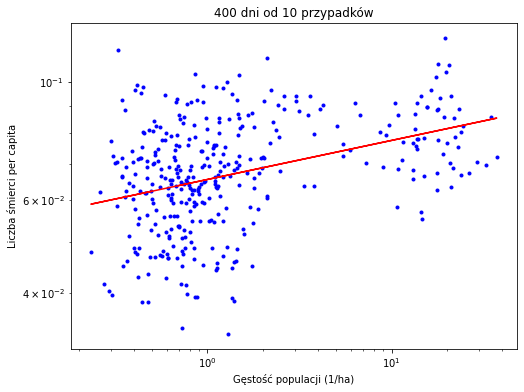

In [29]:
#Wykres całkowitej liczby zakażeń per capita od gęstości populacji dla wybranego dnia pandemii razem z dopasowaniem
#skala log-log

pandemic_day_num = 400
x = infections.loc[infections['pandemic_day'] == pandemic_day_num, 'density_ppl_per_ha']
infectionss = infections.loc[infections['pandemic_day'] == pandemic_day_num, 'infected_total']
popul = infections.loc[infections['pandemic_day'] == pandemic_day_num, 'population']
y = infectionss / popul

a, b, r, p, std_err = fit_n_plot_loglog_scipy(x, y, str(pandemic_day_num)+" dni od 10 przypadków", "Gęstość populacji (1/ha)", "Liczba śmierci per capita")
print("a = "+str(a))
print("b = "+str(b))
print("R^2 = "+str(r*r))
print("p = "+str(p))

a = -0.020494932330949293
b = -2.6802874946187774
R^2 = 0.009942775931555143
p = 0.05211137421509637


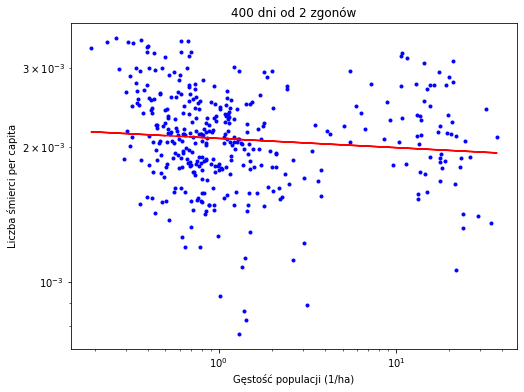

In [30]:
#Wykres całkowitej liczby śmierci per capita od gęstości populacji dla wybranego dnia pandemii razem z dopasowaniem
#skala log-log

pandemic_day_num = 400
x = deaths.loc[deaths['pandemic_day'] == pandemic_day_num, 'density_ppl_per_ha']
deathss = deaths.loc[deaths['pandemic_day'] == pandemic_day_num, 'dead_total']
popul = deaths.loc[deaths['pandemic_day'] == pandemic_day_num, 'population']
y = deathss / popul

a, b, r, p, std_err = fit_n_plot_loglog_scipy(x, y, str(pandemic_day_num)+" dni od 2 zgonów", "Gęstość populacji (1/ha)", "Liczba śmierci per capita")
print("a = "+str(a))
print("b = "+str(b))
print("R^2 = "+str(r*r))
print("p = "+str(p))

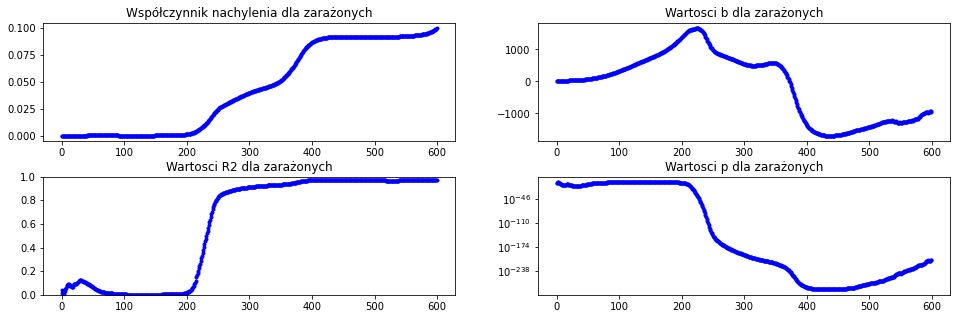

In [31]:
#Wykres nachylenia prostej dla przypadków w zależności od kolejnych dni pandemicznych
#+ wykresy jakości dopasowania (dla zależności od populacji) (lin-lin)

#max days_num = 695
days_num = 600
nachylenia = []
wartosci_R2 = []
wartosci_p = []
wartosci_b = []
for i in range(days_num):
    x = infections.loc[infections['pandemic_day'] == i, 'population']
    y = infections.loc[infections['pandemic_day'] == i, 'infected_mean']
    #a = fit_loglog(x, y)
    a, b, r, p = fit_linlin_scipy(x, y)
    nachylenia.append(a)
    wartosci_b.append(b)
    wartosci_R2.append(r*r)
    wartosci_p.append(p)


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 5))
fig.subplots_adjust(left=0.2, hspace = 0.3)
ax[0,0].plot(range(days_num), nachylenia, 'bo', markersize=3, label='a')
ax[0,0].title.set_text('Współczynnik nachylenia dla zarażonych')
ax[0,1].plot(range(days_num), wartosci_b, 'bo', markersize=3, label='b')
ax[0,1].title.set_text('Wartosci b dla zarażonych')
ax[1,0].plot(range(days_num), wartosci_R2, 'bo', markersize=3, label='R2')
ax[1,0].title.set_text('Wartosci R2 dla zarażonych')
ax[1,0].set_ylim([0, 1])
ax[1,1].plot(range(days_num), wartosci_p, 'bo', markersize=3, label='p')
ax[1,1].title.set_text('Wartosci p dla zarażonych')
ax[1,1].set_yscale("log")

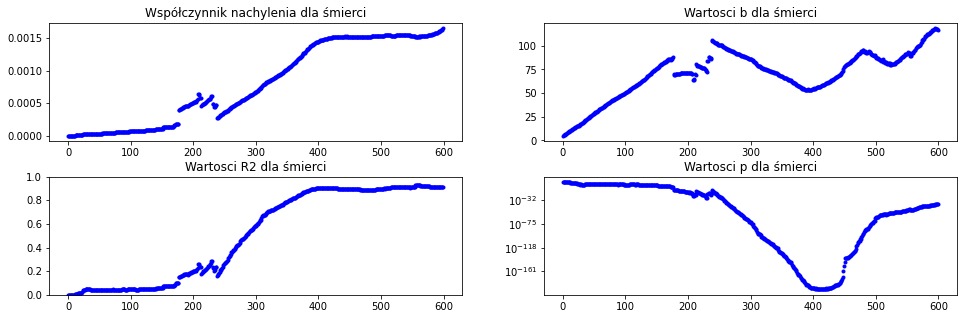

In [32]:
#Wykres nachylenia prostej dla śmierci i w zależności od kolejnych dni pandemicznych
#+ wykresy jakości dopasowania (dla zależności od populacji) (lin-lin)

#max days_num = 691
days_num = 600
nachylenia = []
wartosci_R2 = []
wartosci_p = []
wartosci_b = []
for i in range(days_num):
    x = deaths.loc[deaths['pandemic_day'] == i, 'population']
    y = deaths.loc[deaths['pandemic_day'] == i, 'dead_total']
    #a = fit_loglog(x, y)
    a, b, r, p = fit_linlin_scipy(x, y)
    nachylenia.append(a)
    wartosci_b.append(b)
    wartosci_R2.append(r*r)
    wartosci_p.append(p)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 5))
fig.subplots_adjust(left=0.2, hspace = 0.3)
ax[0,0].plot(range(days_num), nachylenia, 'bo', markersize=3, label='a')
ax[0,0].title.set_text('Współczynnik nachylenia dla śmierci')
ax[0,1].plot(range(days_num), wartosci_b, 'bo', markersize=3, label='b')
ax[0,1].title.set_text('Wartosci b dla śmierci')
ax[1,0].plot(range(days_num), wartosci_R2, 'bo', markersize=3, label='R2')
ax[1,0].title.set_text('Wartosci R2 dla śmierci')
ax[1,0].set_ylim([0, 1])
ax[1,1].plot(range(days_num), wartosci_p, 'bo', markersize=3, label='p')
ax[1,1].title.set_text('Wartosci p dla śmierci')
ax[1,1].set_yscale("log")

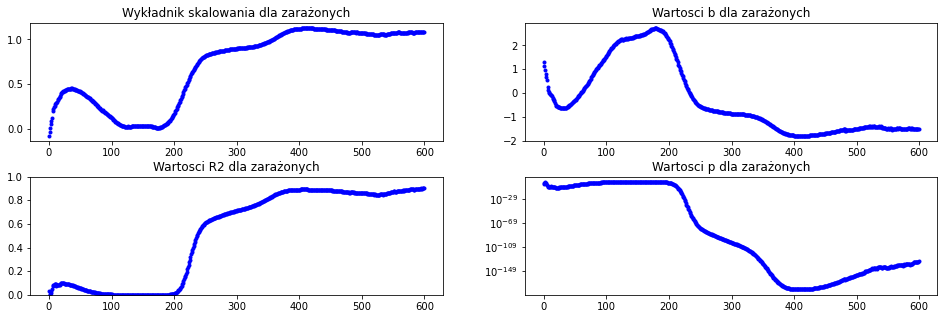

In [33]:
#Wykres wykładnika skalowania dla przypadków i (nachylenia prostej) w zależności od kolejnych dni pandemicznych
#+ wykresy jakości dopasowania (dla zależności od populacji) (log-log)

days_num = 600
wykladniki = []
wartosci_R2 = []
wartosci_p = []
wartosci_b = []
for i in range(days_num):
    x = infections.loc[infections['pandemic_day'] == i, 'population']
    y = infections.loc[infections['pandemic_day'] == i, 'infected_mean']
    #a = fit_loglog(x, y)
    a, b, r, p = fit_loglog_scipy(x, y)
    wykladniki.append(a)
    wartosci_b.append(b)
    wartosci_R2.append(r*r)
    wartosci_p.append(p)


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 5))
fig.subplots_adjust(left=0.2, hspace = 0.3)
ax[0,0].plot(range(days_num), wykladniki, 'bo', markersize=3, label='a')
ax[0,0].title.set_text('Wykładnik skalowania dla zarażonych')
ax[0,1].plot(range(days_num), wartosci_b, 'bo', markersize=3, label='b')
ax[0,1].title.set_text('Wartosci b dla zarażonych')
ax[1,0].plot(range(days_num), wartosci_R2, 'bo', markersize=3, label='R2')
ax[1,0].title.set_text('Wartosci R2 dla zarażonych')
ax[1,0].set_ylim([0, 1])
ax[1,1].plot(range(days_num), wartosci_p, 'bo', markersize=3, label='p')
ax[1,1].title.set_text('Wartosci p dla zarażonych')
ax[1,1].set_yscale("log")

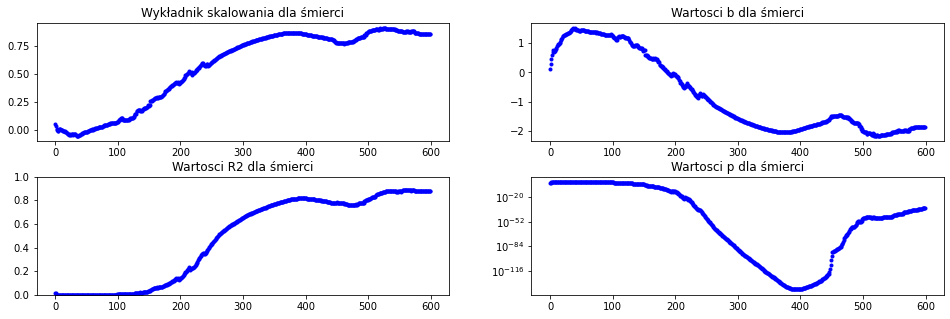

In [34]:
#Wykres wykładnika skalowania dla śmierci i (nachylenia prostej) w zależności od kolejnych dni pandemicznych
#+ wykresy jakości dopasowania (dla zależności od populacji) (log-log)

days_num = 600
wykladniki = []
wartosci_R2 = []
wartosci_p = []
wartosci_b = []
for i in range(days_num):
    x = deaths.loc[deaths['pandemic_day'] == i, 'population']
    y = deaths.loc[deaths['pandemic_day'] == i, 'dead_mean']
    #a = fit_loglog(x, y)
    a, b, r, p = fit_loglog_scipy(x, y)
    wykladniki.append(a)
    wartosci_b.append(b)
    wartosci_R2.append(r*r)
    wartosci_p.append(p)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 5))
fig.subplots_adjust(left=0.2, hspace = 0.3)
ax[0,0].plot(range(days_num), wykladniki, 'bo', markersize=3, label='a')
ax[0,0].title.set_text('Wykładnik skalowania dla śmierci')
ax[0,1].plot(range(days_num), wartosci_b, 'bo', markersize=3, label='b')
ax[0,1].title.set_text('Wartosci b dla śmierci')
ax[1,0].plot(range(days_num), wartosci_R2, 'bo', markersize=3, label='R2')
ax[1,0].title.set_text('Wartosci R2 dla śmierci')
ax[1,0].set_ylim([0, 1])
ax[1,1].plot(range(days_num), wartosci_p, 'bo', markersize=3, label='p')
ax[1,1].title.set_text('Wartosci p dla śmierci')
ax[1,1].set_yscale("log")

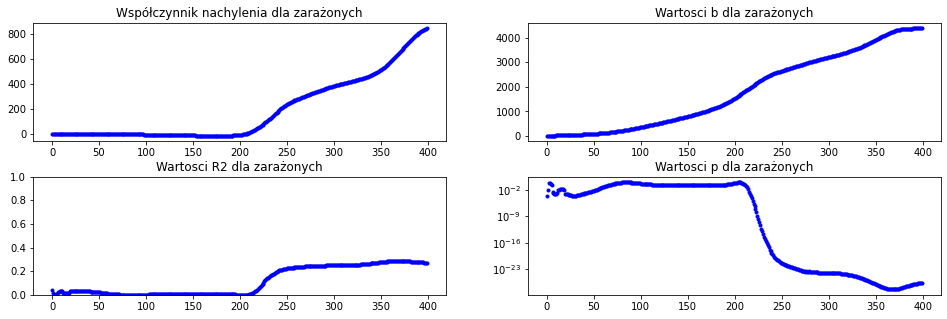

In [35]:
#Wykres nachylenia prostej dla przypadków i w zależności od kolejnych dni pandemicznych
#+ wykresy jakości dopasowania (dla zależności od gęstości populacji) (lin-lin)

days_num = 400
nachylenia = []
wartosci_R2 = []
wartosci_p = []
wartosci_b = []
for i in range(days_num):
    x = infections.loc[infections['pandemic_day'] == i, 'density_ppl_per_ha']
    y = infections.loc[infections['pandemic_day'] == i, 'infected_mean']
    #a = fit_loglog(x, y)
    a, b, r, p = fit_linlin_scipy(x, y)
    nachylenia.append(a)
    wartosci_b.append(b)
    wartosci_R2.append(r*r)
    wartosci_p.append(p)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 5))
fig.subplots_adjust(left=0.2, hspace = 0.3)
ax[0,0].plot(range(days_num), nachylenia, 'bo', markersize=3, label='a')
ax[0,0].title.set_text('Współczynnik nachylenia dla zarażonych')
ax[0,1].plot(range(days_num), wartosci_b, 'bo', markersize=3, label='b')
ax[0,1].title.set_text('Wartosci b dla zarażonych')
ax[1,0].plot(range(days_num), wartosci_R2, 'bo', markersize=3, label='R2')
ax[1,0].title.set_text('Wartosci R2 dla zarażonych')
ax[1,0].set_ylim([0, 1])
ax[1,1].plot(range(days_num), wartosci_p, 'bo', markersize=3, label='p')
ax[1,1].title.set_text('Wartosci p dla zarażonych')
ax[1,1].set_yscale("log")

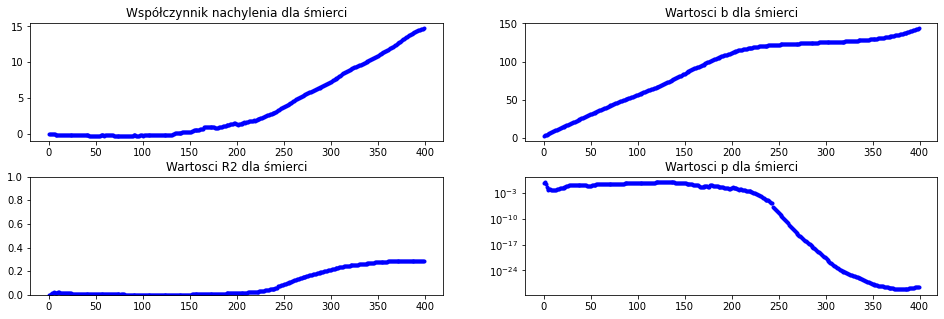

In [36]:
#Wykres wykładnika skalowania dla śmierci i (nachylenia prostej) w zależności od kolejnych dni pandemicznych
#+ wykresy jakości dopasowania (dla zależności od gęstości populacji) (lin-lin)

days_num = 400
nachylenia = []
wartosci_R2 = []
wartosci_p = []
wartosci_b = []
for i in range(days_num):
    x = deaths.loc[deaths['pandemic_day'] == i, 'density_ppl_per_ha']
    y = deaths.loc[deaths['pandemic_day'] == i, 'dead_mean']
    #a = fit_loglog(x, y)
    a, b, r, p = fit_linlin_scipy(x, y)
    nachylenia.append(a)
    wartosci_b.append(b)
    wartosci_R2.append(r*r)
    wartosci_p.append(p)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 5))
fig.subplots_adjust(left=0.2, hspace = 0.3)
ax[0,0].plot(range(days_num), nachylenia, 'bo', markersize=3, label='a')
ax[0,0].title.set_text('Współczynnik nachylenia dla śmierci')
ax[0,1].plot(range(days_num), wartosci_b, 'bo', markersize=3, label='b')
ax[0,1].title.set_text('Wartosci b dla śmierci')
ax[1,0].plot(range(days_num), wartosci_R2, 'bo', markersize=3, label='R2')
ax[1,0].title.set_text('Wartosci R2 dla śmierci')
ax[1,0].set_ylim([0, 1])
ax[1,1].plot(range(days_num), wartosci_p, 'bo', markersize=3, label='p')
ax[1,1].title.set_text('Wartosci p dla śmierci')
ax[1,1].set_yscale("log")

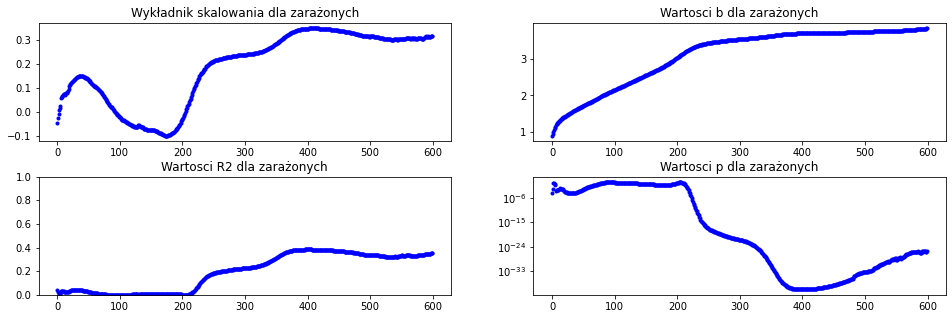

In [37]:
#Wykres wykładnika skalowania dla przypadków i (nachylenia prostej) w zależności od kolejnych dni pandemicznych
#+ wykresy jakości dopasowania (dla zależności od gęstości populacji) (log-log)

days_num = 600
wykladniki = []
wartosci_R2 = []
wartosci_p = []
wartosci_b = []
for i in range(days_num):
    x = infections.loc[infections['pandemic_day'] == i, 'density_ppl_per_ha']
    y = infections.loc[infections['pandemic_day'] == i, 'infected_mean']
    #a = fit_loglog(x, y)
    a, b, r, p = fit_loglog_scipy(x, y)
    wykladniki.append(a)
    wartosci_b.append(b)
    wartosci_R2.append(r*r)
    wartosci_p.append(p)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 5))
fig.subplots_adjust(left=0.2, hspace = 0.3)
ax[0,0].plot(range(days_num), wykladniki, 'bo', markersize=3, label='a')
ax[0,0].title.set_text('Wykładnik skalowania dla zarażonych')
ax[0,1].plot(range(days_num), wartosci_b, 'bo', markersize=3, label='b')
ax[0,1].title.set_text('Wartosci b dla zarażonych')
ax[1,0].plot(range(days_num), wartosci_R2, 'bo', markersize=3, label='R2')
ax[1,0].title.set_text('Wartosci R2 dla zarażonych')
ax[1,0].set_ylim([0, 1])
ax[1,1].plot(range(days_num), wartosci_p, 'bo', markersize=3, label='p')
ax[1,1].title.set_text('Wartosci p dla zarażonych')
ax[1,1].set_yscale("log")

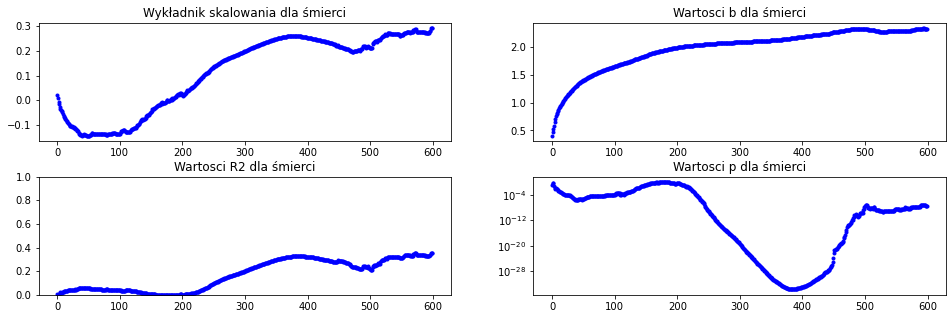

In [38]:
#Wykres wykładnika skalowania dla śmierci i (nachylenia prostej) w zależności od kolejnych dni pandemicznych
#+ wykresy jakości dopasowania (dla zależności od gęstości populacji) (log-log)

days_num = 600
wykladniki = []
wartosci_R2 = []
wartosci_p = []
wartosci_b = []
for i in range(days_num):
    x = deaths.loc[deaths['pandemic_day'] == i, 'density_ppl_per_ha']
    y = deaths.loc[deaths['pandemic_day'] == i, 'dead_mean']
    #a = fit_loglog(x, y)
    a, b, r, p = fit_loglog_scipy(x, y)
    wykladniki.append(a)
    wartosci_b.append(b)
    wartosci_R2.append(r*r)
    wartosci_p.append(p)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 5))
fig.subplots_adjust(left=0.2, hspace = 0.3)
ax[0,0].plot(range(days_num), wykladniki, 'bo', markersize=3, label='a')
ax[0,0].title.set_text('Wykładnik skalowania dla śmierci')
ax[0,1].plot(range(days_num), wartosci_b, 'bo', markersize=3, label='b')
ax[0,1].title.set_text('Wartosci b dla śmierci')
ax[1,0].plot(range(days_num), wartosci_R2, 'bo', markersize=3, label='R2')
ax[1,0].title.set_text('Wartosci R2 dla śmierci')
ax[1,0].set_ylim([0, 1])
ax[1,1].plot(range(days_num), wartosci_p, 'bo', markersize=3, label='p')
ax[1,1].title.set_text('Wartosci p dla śmierci')
ax[1,1].set_yscale("log")

In [39]:
#Wykres całkowitej liczby przypadków per capita od populacji dla wybranego dnia pandemii

# x = infections.loc[infections['pandemic_day'] == 200, 'population']
# y = infections.loc[infections['pandemic_day'] == 200, 'infected_total']

# y = y / x
# plt.plot(x, y, 'bo')
# plt.title("200 dni od 2 przypadków")
# plt.yscale("log")
# plt.xscale("log")
# plt.xlabel('Populacja')
# plt.ylabel('Liczba zakażeń per capita')

In [40]:
#Wykres całkowitej liczby śmierci per capita od populacji dla pierwszego dnia pandemii

# x = deaths.loc[deaths['pandemic_day'] == 200, 'population']
# y = deaths.loc[deaths['pandemic_day'] == 200, 'dead_total']

# y = y / x
# plt.plot(x, y, 'bo')
# plt.title("200 dni od 2 przypadków")
# plt.yscale("log")
# plt.xscale("log")
# plt.xlabel('Populacja')
# plt.ylabel('Liczba zgonów per capita')